In [1]:
import os, pickle, time, shutil, csv
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
"""
Prints the image
Input: image pixels in list
"""

def print_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.colorbar()
    plt.show()

def time_taken(start, end):
    time = end-start
    day = time // (24 * 3600)
    time = time % (24 * 3600)
    hour = time // 3600
    time %= 3600
    minutes = time // 60
    time %= 60
    seconds = time
    day_hour_min_sec = str('%02d' % int(day))+":"+str('%02d' % int(hour))+":"+str('%02d' % int(minutes))+":"+str('%02d' % int(seconds))
    return day_hour_min_sec

In [3]:
"""
Works on Python 3
Read from category_object_labels.bin
Now the original objects can be retrieved ("loaded") from category_object_labels.bin
in the same order as they were written ("dumped") into it
"""

path = r"D:\MS-Project-Data\cyclone101_cleanedup"

bin_file = open(path+os.sep+"category_object_labels.bin", "rb")

category_labels = pickle.load(bin_file)
object_labels = pickle.load(bin_file)

bin_file.close()

In [4]:
"""
Works on Python 3
Read from behavior+"_"+image_size+"_"+test_exec+"_as_test.bin"
Now the original objects can be retrieved ("loaded") from _.bin in the same order as they were written ("dumped") into it
"""

path = r"D:\MS-Project-Data\cyclone101_cleanedup\crush_120x90_CategoryRecognition"
db_file_name = "crush_120x90_testset1.bin"

bin_file = open(path+os.sep+db_file_name, "rb")

video_frames_5d_train = pickle.load(bin_file)
category_label_train = pickle.load(bin_file)
object_label_train = pickle.load(bin_file)
category_label_train_one_not = pickle.load(bin_file)
object_label_train_one_not = pickle.load(bin_file)

video_frames_5d_test = pickle.load(bin_file)
category_label_test = pickle.load(bin_file)
object_label_test = pickle.load(bin_file)
category_label_test_one_not = pickle.load(bin_file)
object_label_test_one_not = pickle.load(bin_file)

bin_file.close()

(400, 48, 90, 120, 3)


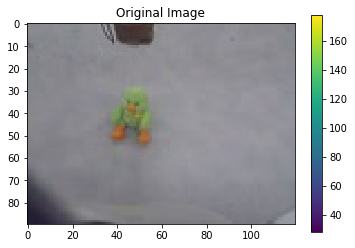

Category:  smallstuffedanimal
Object:  smallstuffedanimal_chick


In [5]:
"""
Display a frame from the dataset

batch_video_frames_5d_train #[batch, frames, height, width, channel]
"""

batch_no = 300
frame_no = 20

print(video_frames_5d_train.shape) # [batch, frames, height, width, channel]

print_image(video_frames_5d_train[batch_no][frame_no], "Original Image")
# Using batch_category_label_train to get the unique number label of the example
print("Category: ", list(category_labels.keys())[list(category_labels.values()).index(category_label_train[batch_no])])
print("Object: ", list(object_labels.keys())[list(object_labels.values()).index(object_label_train[batch_no])])

# https://github.com/talhasaruhan/video-action-classification

In [6]:
# Parameters
batch = 1
training_epochs = 150
display_step = 1

frames = time_step_size = video_frames_5d_train.shape[1]
height = video_frames_5d_train.shape[2]
width = video_frames_5d_train.shape[3]
channel = video_frames_5d_train.shape[4]
num_classes = C = category_label_train_one_not.shape[1]

model_path = db_file_name.split(".")[0]+"_logs/model.ckpt"
logs_path = db_file_name.split(".")[0]+"_logs/"

X = tf.placeholder('float', [frames, height, width, channel], name='InputData')
Y = tf.placeholder('float', [None, num_classes], name='LabelData')
keep_prob = tf.placeholder_with_default(1.0, shape=(), name = 'keep')

num_spatial_frames = tf.shape(X)[0]
print(num_spatial_frames)

Tensor("strided_slice:0", shape=(), dtype=int32)


In [7]:

"""
net = tf.layers.conv2d(inputs=X, filters=32, kernel_size=3, padding='SAME', activation=tf.nn.relu)
"""
"""
def conv_layer(bottom, in_channels, out_channels, name):
    with tf.variable_scope(name):
        filt, conv_biases = get_conv_var(3, in_channels, out_channels, name)
        conv = tf.nn.conv2d(bottom, filt, [1, 1, 1, 1], padding='SAME')
        bias = tf.nn.bias_add(conv, conv_biases)
        relu = tf.nn.relu(bias)
        return relu

def get_conv_var(filter_size, in_channels, out_channels, name):
    weights = get_var(name + "_weights", [filter_size, filter_size, in_channels, out_channels])
    biases = get_var(name + "_biases", [out_channels])
    return weights, biases

def get_var(name, shape):
    var = tf.get_variable(name, shape, initializer=tf.truncated_normal_initializer(0.0, 0.001))
    return var

def max_pool(bottom, name):
    return tf.nn.max_pool(bottom, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name=name)

def fc_layer(bottom, in_size, out_size, name):
    with tf.variable_scope(name):
        weights, biases = get_fc_var(in_size, out_size, name)
        x = tf.reshape(bottom, [-1, in_size])
        fc = tf.nn.bias_add(tf.matmul(x, weights), biases)
        return fc

def get_fc_var(in_size, out_size, name):
    weights = get_var(name + "_weights", [in_size, out_size])
    biases = get_var(name + "_biases", [out_size])
    return weights, biases

def fc_layer_2(name, prev, shape, gate="relu", mean=0.0, dev=1e-3):
    with tf.variable_scope(name):
        weights, biases = initialize_fc(name, shape, mean, dev)
        output = tf.matmul(prev, weights)+biases

        if gate == "relu":
            output = tf.nn.relu(output)
        elif gate == "tanh":
            output = tf.tanh(output)
        elif gate == "sigmoid":
            output = tf.sigmoid(output)

        return output

def initialize_fc(name, shape, mean=0.0, dev=1e-3, scope=None):
    assert len(shape) == 2
    weight = tf.get_variable(name+"_weights", shape, dtype=tf.float32,
                                  initializer=tf.zeros_initializer())
    bias = tf.get_variable(name+"_biases", shape[-1], dtype=tf.float32,
                                  initializer=tf.zeros_initializer())
    return weight, bias
"""

'\ndef conv_layer(bottom, in_channels, out_channels, name):\n    with tf.variable_scope(name):\n        filt, conv_biases = get_conv_var(3, in_channels, out_channels, name)\n        conv = tf.nn.conv2d(bottom, filt, [1, 1, 1, 1], padding=\'SAME\')\n        bias = tf.nn.bias_add(conv, conv_biases)\n        relu = tf.nn.relu(bias)\n        return relu\n\ndef get_conv_var(filter_size, in_channels, out_channels, name):\n    weights = get_var(name + "_weights", [filter_size, filter_size, in_channels, out_channels])\n    biases = get_var(name + "_biases", [out_channels])\n    return weights, biases\n\ndef get_var(name, shape):\n    var = tf.get_variable(name, shape, initializer=tf.truncated_normal_initializer(0.0, 0.001))\n    return var\n\ndef max_pool(bottom, name):\n    return tf.nn.max_pool(bottom, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding=\'SAME\', name=name)\n\ndef fc_layer(bottom, in_size, out_size, name):\n    with tf.variable_scope(name):\n        weights, biases = get_fc_va

In [8]:
def model(bgr):
    with tf.name_scope("Model"):
        filters_1 = 32 #64
        #net = conv_layer(bgr, 3, filters_1, "conv1_1")
        net = tf.layers.conv2d(inputs=bgr, filters=filters_1, kernel_size=3, padding='SAME', activation=tf.nn.relu)
        print(net)
#         net = conv_layer(net, filters_1, filters_1, "conv1_2")
#         print(net)
        #net = max_pool(net, 'pool1')
        net = tf.nn.max_pool(net, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        print(net)
        
        filters_2 = 64 #128
        #net = conv_layer(net, filters_1, filters_2, "conv2_1")
        net = tf.layers.conv2d(inputs=net, filters=filters_2, kernel_size=3, padding='SAME', activation=tf.nn.relu)
        print(net)
#         net = conv_layer(net, filters_2, filters_2, "conv2_2")
#         print(net)
        #net = max_pool(net, 'pool2')
        net = tf.nn.max_pool(net, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        print(net)
        
        filters_3 = 128 #256
        #net = conv_layer(net, filters_2, filters_3, "conv3_1")
        net = tf.layers.conv2d(inputs=net, filters=filters_3, kernel_size=3, padding='SAME', activation=tf.nn.relu)
        print(net)
#         net = conv_layer(net, filters_3, filters_3, "conv3_2")
#         print(net)
#         net = conv_layer(net, filters_3, filters_3, "conv3_3")
#         print(net)
#         net = conv_layer(net, filters_3, filters_3, "conv3_4")
#         print(net)
        #net = max_pool(net, 'pool3')
        net = tf.nn.max_pool(net, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        print(net)
        
        filters_4 = 256 #512
        #net = conv_layer(net, filters_3, filters_4, "conv4_1")
        net = tf.layers.conv2d(inputs=net, filters=filters_4, kernel_size=3, padding='SAME', activation=tf.nn.relu)
        print(net)
#         net = conv_layer(net, filters_4, filters_4, "conv4_2")
#         print(net)
#         net = conv_layer(net, filters_4, filters_4, "conv4_3")
#         print(net)
#         net = conv_layer(net, filters_4, filters_4, "conv4_4")
#         print(net)
        #net = max_pool(net, 'pool4')
        net = tf.nn.max_pool(net, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        print(net)
        
        #net = conv_layer(net, filters_4, filters_4, "conv5_1")
        net = tf.layers.conv2d(inputs=net, filters=filters_4, kernel_size=3, padding='SAME', activation=tf.nn.relu)
        print(net)
#         net = conv_layer(net, filters_4, filters_4, "conv5_2")
#         print(net)
#         net = conv_layer(net, filters_4, filters_4, "conv5_3")
#         print(net)
#         net = conv_layer(net, filters_4, filters_4, "conv5_4")
#         print(net)
        #net = max_pool(net, 'pool5')
        net = tf.nn.max_pool(net, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        print(net)
        
        #net = fc_layer(net, 3072, 4096, "fc6")
        # (90//(2 ** 5))*(120//(2 ** 5))*512 = 5400
        # 3*4*256 = 3072
        net = tf.reshape(net, [-1, 3 * 4 * 256])
        net = tf.layers.dense(inputs=net, units=4096, activation=tf.nn.relu)
        print(net)
        #net = tf.nn.relu(net)
        #print(net)

#         train_mode=None
#         #train_mode=True
#         trainable=True
#         #dropout=0.5
#         if train_mode is not None:
#             relu6 = tf.cond(train_mode, lambda: tf.nn.dropout(relu6, dropout), lambda: relu6)
#         elif trainable:
#             #relu6 = tf.nn.dropout(relu6, dropout)
        net = tf.nn.dropout(net, keep_prob)
        print(net)
        
        net = tf.reshape(net, [1, num_spatial_frames, 4096])
        print(net)
        
        # build spatial LSTM network
        with tf.variable_scope("spatial_lstm"):
            lstm_stack = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicLSTMCell(1024, state_is_tuple=True), 
                                                      tf.contrib.rnn.BasicLSTMCell(512, state_is_tuple=True)], state_is_tuple=True)
            print(lstm_stack)
            spatial_lstm = tf.nn.dynamic_rnn(lstm_stack, net, dtype=tf.float32, time_major=False)
            print(spatial_lstm)
            print(spatial_lstm[0][0])
            spatial_features = tf.reduce_sum(spatial_lstm[0][0], axis=0, keep_dims=True)
            print(spatial_features)
        
        #net = fc_layer_2("fc_spatial", spatial_features, (512, 200), "relu", 0.0, 0.001)
        net = tf.layers.dense(inputs=spatial_features, units=200, activation=tf.nn.relu)
        print(net)
        
        #fusion = fc_spatial
        #fusion = fc_layer_2("fusion", fusion_layer_input, (400, 200), "relu", 0.0, 0.001)
        #fusion = fc_layer_2("fusion", fusion_layer_input, (200, 200), "relu", 0.0, 0.001)
        #print(fusion)
        #logits = fc_layer_2("softmax", net, (200, C), "linear", 0.0, 0.001)
        logits = tf.layers.dense(inputs=net, units=num_classes, activation=None, name='logits')
        print(logits)
        
    return logits

prediction = model(X)

with tf.name_scope('Loss'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=Y))
    
# Define optimizer
with tf.name_scope('Optimizer'):
    #Method 3
    #optimizer = tf.train.AdamOptimizer(0.0001)
    #gradients = optimizer.compute_gradients(cost)
    #capped_gradients = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients]
    #train_op = optimizer.apply_gradients(capped_gradients)
    
    #Method 2
    #train_op = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
    
    #Method 1.1
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
    train_op = optimizer.minimize(cost)
    
    #Method 1
    #optimizer = tf.train.AdamOptimizer(learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08, use_locking=False, name='Adam')
    #train_op = optimizer.minimize(cost)

with tf.name_scope('Accuracy'):
    # Test model
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

# Initializing the variables
init = tf.global_variables_initializer()

# 'Saver' op to save and restore all the variables
saver = tf.train.Saver(max_to_keep=1)

# Create a summary to monitor cost tensor
tf.summary.scalar("loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("accuracy", accuracy)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()

Tensor("Model/conv2d/Relu:0", shape=(48, 90, 120, 32), dtype=float32)
Tensor("Model/MaxPool:0", shape=(48, 45, 60, 32), dtype=float32)
Tensor("Model/conv2d_2/Relu:0", shape=(48, 45, 60, 64), dtype=float32)
Tensor("Model/MaxPool_1:0", shape=(48, 23, 30, 64), dtype=float32)
Tensor("Model/conv2d_3/Relu:0", shape=(48, 23, 30, 128), dtype=float32)
Tensor("Model/MaxPool_2:0", shape=(48, 12, 15, 128), dtype=float32)
Tensor("Model/conv2d_4/Relu:0", shape=(48, 12, 15, 256), dtype=float32)
Tensor("Model/MaxPool_3:0", shape=(48, 6, 8, 256), dtype=float32)
Tensor("Model/conv2d_5/Relu:0", shape=(48, 6, 8, 256), dtype=float32)
Tensor("Model/MaxPool_4:0", shape=(48, 3, 4, 256), dtype=float32)
Tensor("Model/dense/Relu:0", shape=(48, 4096), dtype=float32)
Tensor("Model/dropout/mul:0", shape=(48, 4096), dtype=float32)
Tensor("Model/Reshape_1:0", shape=(1, 48, 4096), dtype=float32)
(<tf.Tensor 'Model/spatial_lstm/rnn/transpose:0' shape=(1, 48, 512) dtype=float32>, (LSTMStateTuple(c=<tf.Tensor 'Model/spat

In [9]:
if os.path.exists(logs_path):
    shutil.rmtree(logs_path)
    os.makedirs(logs_path)
else:
    os.makedirs(logs_path)

In [10]:
"""
Writing data in CSV file
"""

epoch_cost_accuracy = []
epoch_cost_accuracy.append("Time")
epoch_cost_accuracy.append("Epoch")
epoch_cost_accuracy.append("Cost")
epoch_cost_accuracy.append("Accuracy")

print(epoch_cost_accuracy)

['Time', 'Epoch', 'Cost', 'Accuracy']


In [ ]:
with open(logs_path+db_file_name.split(".")[0]+"_data.csv",'w') as f:
    writer = csv.writer(f, lineterminator="\n")
    writer.writerow(epoch_cost_accuracy)

In [ ]:

start_time = time.time()

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
  
    for epoch in range(training_epochs):
        
        avg_cost = 0.
        total_batch = int(len(video_frames_5d_train)/batch)
        for example_index in range(len(video_frames_5d_train)):
            labels_y = []
            labels_y.append(category_label_train_one_not[example_index])
            batch_x, batch_y = video_frames_5d_train[example_index], labels_y
            _, c = sess.run([train_op, cost], feed_dict={X: batch_x, Y: batch_y, keep_prob: 0.5})
            avg_cost += c / total_batch
#             logits_output = sess.run(logits, feed_dict={X: input_x})
        
        # Accuracy
        avg_acc = 0.
        total_batch = int(len(video_frames_5d_test)/batch)
        for example_index in range(len(video_frames_5d_test)):
            labels_y = []
            labels_y.append(category_label_test_one_not[example_index])
            batch_x, batch_y = video_frames_5d_test[example_index], labels_y
            acc = sess.run(accuracy, feed_dict={X: batch_x, Y: batch_y})
            avg_acc += acc / total_batch
        
        print("Epoch:", '%04d' % (epoch+1), "Time: ", time_taken(start_time, time.time()), "cost =", "{:.9f}".format(avg_cost), "accuracy = ", "{:.9f}".format(avg_acc))
        save_path = saver.save(sess, model_path, epoch)
        
        epoch_cost_accuracy = []
        epoch_cost_accuracy.append(time_taken(start_time, time.time()))
        epoch_cost_accuracy.append(epoch+1)
        epoch_cost_accuracy.append(avg_cost)
        epoch_cost_accuracy.append(avg_acc)
        # Writing current epoch data
        with open(logs_path+db_file_name.split(".")[0]+"_data.csv", 'a') as f: # append to the file created
            writer = csv.writer(f, lineterminator="\n")
            writer.writerow(epoch_cost_accuracy)
            
#             print(logits_output.shape)
#             sess.run(train_op, feed_dict={X: input_x, Y: input_y})
#             loss, acc = sess.run([loss_op, accuracy], feed_dict={X: input_x, Y: input_y})
#             print("loss: ", loss)
#             print("acc: ", acc)

Epoch: 0001 Time:  00:00:04:17 cost = 18.547563822 accuracy =  0.050000000
Epoch: 0002 Time:  00:00:08:39 cost = 13.489034371 accuracy =  0.050000000
Epoch: 0003 Time:  00:00:13:00 cost = 12.298599393 accuracy =  0.050000000
Epoch: 0004 Time:  00:00:17:16 cost = 2.936262101 accuracy =  0.050000000
Epoch: 0005 Time:  00:00:21:33 cost = 2.998174276 accuracy =  0.050000000
Epoch: 0006 Time:  00:00:25:49 cost = 2.998097980 accuracy =  0.050000000
Epoch: 0007 Time:  00:00:30:03 cost = 2.998056704 accuracy =  0.050000000


In [ ]:
# Evaluate on test set

with tf.Session() as sess:
    # Initialize variables
    sess.run(init)
    # Restore
    saver.restore(sess, tf.train.latest_checkpoint(logs_path))
    
    # Accuracy
    avg_acc = 0.
    total_batch = int(len(video_frames_5d_test)/batch)
    for example_index in range(len(video_frames_5d_test)):
        labels_y = []
        labels_y.append(category_label_test_one_not[example_index])
        batch_x, batch_y = video_frames_5d_test[example_index], labels_y
        acc = sess.run(accuracy, feed_dict={X: batch_x, Y: batch_y})
        avg_acc += acc / total_batch

    print("Accuracy: ", avg_acc)